In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import GradientTape, expand_dims
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from AHCON_T import *
from Game import *
#from Q8_1 import *
from vis import *
import time

In [2]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [4]:
test = 50
board = game()
test_f = []
for i in range(test):
    test_f.append(board.food_pos)
    board.restart()
    

averages_all = []
ff_list_all = []
for rounds in range(1):
    start = time.time()
    train = 300
    train_f = []
    for i in range(train):
        train_f.append(board.food_pos)
        board.restart()
    
    agents = [AHCON_Agent(eta_e=0.001,eta_p=0.001, discount_factor=0.9,H_e= 30, H_p= 30 , board=game(reinforcement_natural_death=-0.7))]
    averages = []
    ff_list =[]
    for a in agents:
        ff = a.analyse_run(test)[2]
        averages.append([ff.mean()])
        ff_list.append([ff])
    xlabel = [0]
    for i in tqdm(range(15)):
        xlabel.append((i+1)*20)
        train_f_slice = train_f[(i*20):((i+1)*20)]
        for j in range(len(agents)):
            _ = agents[j].train_teaching_on_policy(rounds=20,temperature_l=None,teaching=True,prio=True,pl=0.01,food_pos_list=train_f_slice)
            ff = agents[j].analyse_run(test,food_pos_list=test_f)[2]
            averages[j].append(ff.mean())
            ff_list[j].append(ff)
    averages_all.append(averages)
    ff_list_all.append(ff_list)
    print("Runde: ",rounds,"Zeit: ",int((time.time()-start)//60),":",(time.time()-start)%60)
    print(averages_all)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [24:30<00:00, 98.02s/it]

Runde:  0 Zeit:  24 : 44.54143190383911
[[[0.06, 3.82, 3.42, 6.68, 7.22, 8.56, 6.08, 9.64, 8.84, 9.44, 9.52, 8.86, 9.94, 7.78, 9.04, 9.46]]]


In [5]:
sns.set(rc={'figure.figsize':(17,10)})

Text(0, 0.5, 'average food found 50 test rounds')

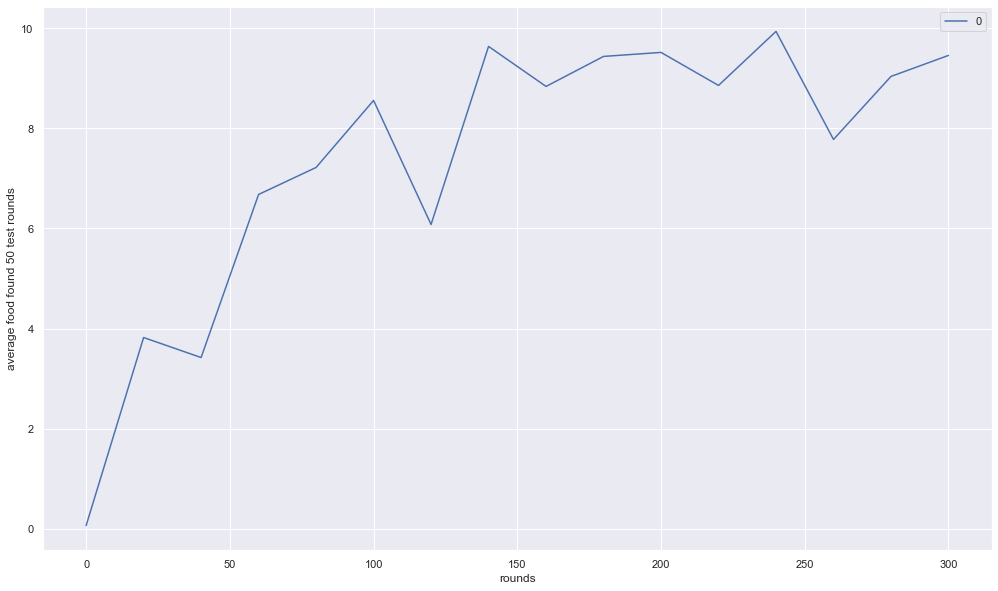

In [6]:
d_list=[]
for d in averages_all:
        d_list.append(d[0])
data = pd.DataFrame(d_list)
data.columns = xlabel

data.T.plot()
plt.xlabel('rounds')
plt.ylabel('average food found 50 test rounds')

In [7]:
data.min(axis=0).to_list()

[0.06,
 3.82,
 3.42,
 6.68,
 7.22,
 8.56,
 6.08,
 9.64,
 8.84,
 9.44,
 9.52,
 8.86,
 9.94,
 7.78,
 9.04,
 9.46]

<AxesSubplot:>

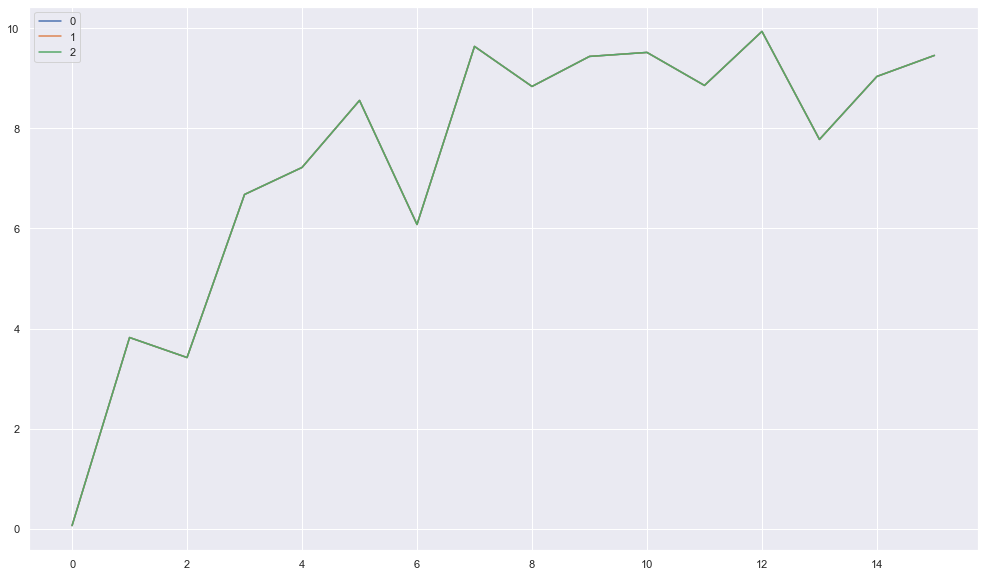

In [8]:
data2 = pd.DataFrame([data.min(axis=0).to_list(),data.max(axis=0).to_list(),data.mean(axis=0).to_list()])

data2.T.plot()


In [9]:
data.columns = data.columns.astype(str)
data.to_parquet("otherTestData/rounds=20,temperature_l=None,teaching=True,prio=True,pl=0.01.parquet")

In [10]:
d_list=[]
for d in ff_list_all:
        d_list.append(d[0])
data3 = pd.DataFrame(d_list)
data3.columns = xlabel

data3.columns = data.columns.astype(str)
data3.to_parquet("otherTestData/rounds=20,temperature_l=None,teaching=True,prio=True,pl=0.01_ff.parquet")

In [11]:
data

,0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300
0,0.06,3.82,3.42,6.68,7.22,8.56,6.08,9.64,8.84,9.44,9.52,8.86,9.94,7.78,9.04,9.46


/Users/eliasschecke/opt/anaconda3/envs/tf/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/eliasschecke/opt/anaconda3/envs/tf/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:>

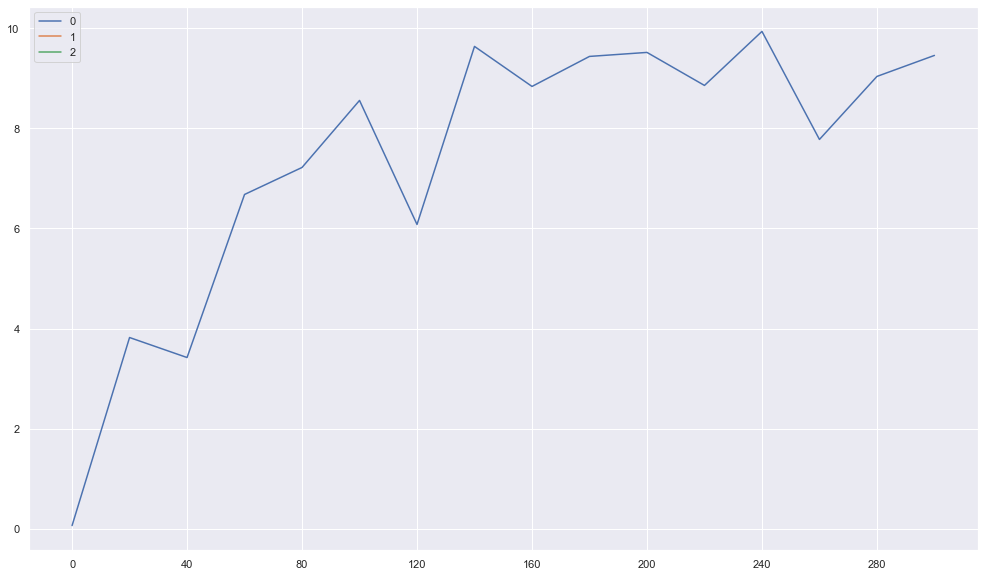

In [15]:
data.apply(mean_confidence_interval,axis=0).T.plot()

In [16]:
agents[0].eval.save("otherTestData/eval")

INFO:tensorflow:Assets written to: otherTestData/eval/assets


2022-01-07 20:39:11.661421: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [17]:
agents[0].policy.save("otherTestData/policy")

INFO:tensorflow:Assets written to: otherTestData/policy/assets


In [18]:
agents[0]

In [19]:
agent = agents[0]

In [20]:
test_tuple = agent.analyse_run(1000)

/Users/eliasschecke/opt/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

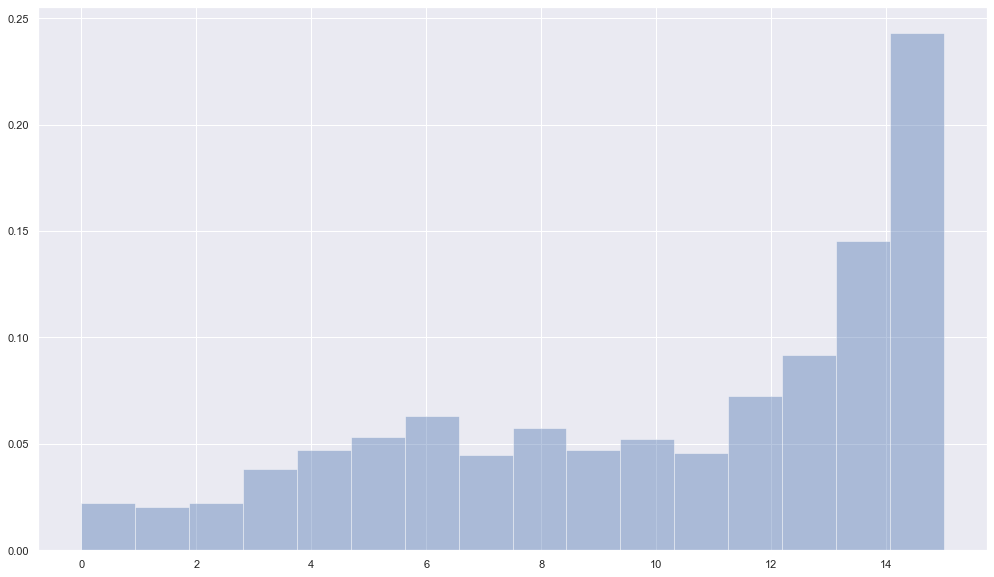

In [21]:
sns.distplot(test_tuple[2].astype(int),kde=False,bins=16,norm_hist=True)

In [22]:
x, y = np.unique(test_tuple[2].astype(int),return_counts=True)
df_test = pd.DataFrame({'x':x,'y':y})

<AxesSubplot:>

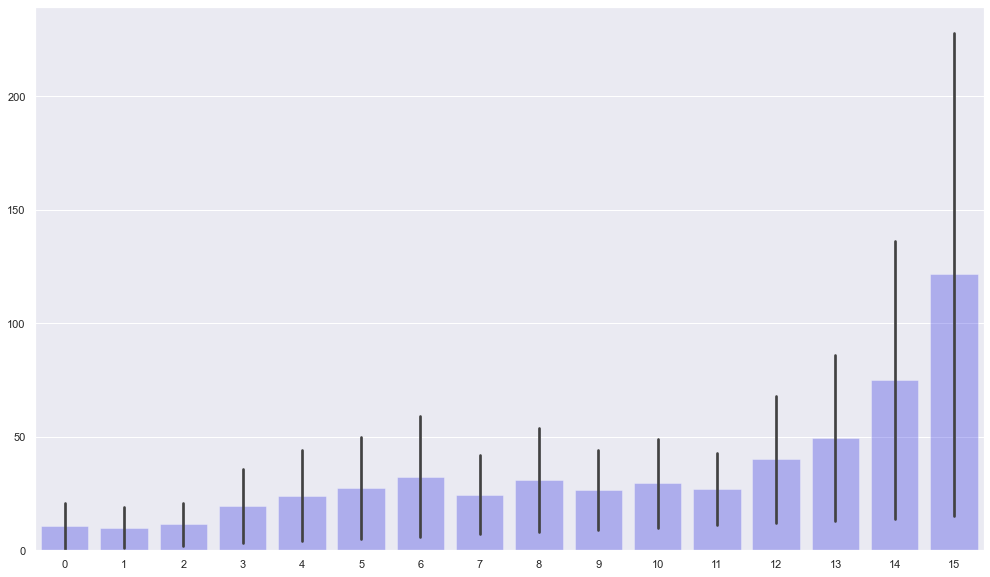

In [23]:
sns.barplot(data = df_test.T,color='blue',alpha=0.3)

<AxesSubplot:>

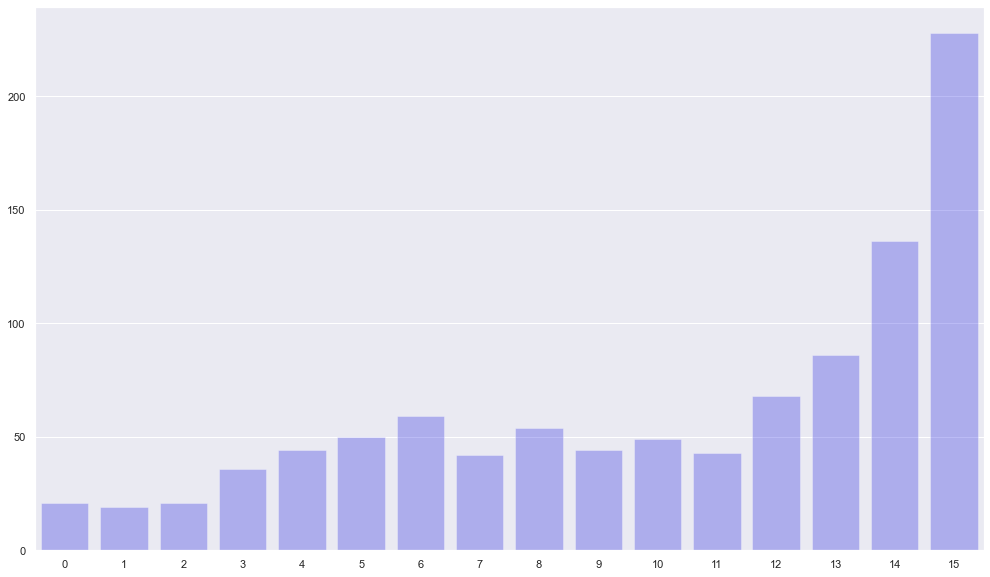

In [24]:
sns.barplot(x=x,y=y,color='blue',alpha=0.3)